<a href="https://colab.research.google.com/github/mudita11/Covid-visual/blob/main/Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import psycopg2
import pandas as pd
import datetime
import seaborn as sns
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19')
cur = conn.cursor()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
sql_command = """SELECT * FROM epidemiology WHERE source = 'USA_NYT' and adm_area_1 = 'Texas'"""
df_epidemiology = pd.read_sql(sql_command, conn)
df_epidemiology.head()

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,tested,confirmed,recovered,dead,hospitalised,hospitalised_icu,quarantined,gid
0,USA_NYT,2021-04-10,United States,USA,Texas,Floyd,None,None,827,None,30,None,None,None,[USA.44.77_1]
1,USA_NYT,2020-07-15,United States,USA,Texas,Montague,None,None,32,None,1,None,None,None,[USA.44.169_1]
2,USA_NYT,2020-07-15,United States,USA,Texas,Montgomery,None,None,4324,None,45,None,None,None,[USA.44.170_1]
3,USA_NYT,2020-07-15,United States,USA,Texas,Moore,None,None,921,None,15,None,None,None,[USA.44.171_1]
4,USA_NYT,2020-07-15,United States,USA,Texas,Morris,None,None,54,None,0,None,None,None,[USA.44.172_1]


In [ ]:
sql_command = """SELECT * FROM epidemiology WHERE source = 'USA_NYT' and adm_area_1 = 'Texas' and adm_area_2 = 'Dallas' and date > '2020-05-01' ORDER BY date"""
test = pd.read_sql(sql_command, conn)
test.head()

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,tested,confirmed,recovered,dead,hospitalised,hospitalised_icu,quarantined,gid
0,USA_NYT,2020-05-02,United States,USA,Texas,Dallas,None,None,3899,None,110,None,None,None,[USA.44.57_1]
1,USA_NYT,2020-05-03,United States,USA,Texas,Dallas,None,None,4133,None,111,None,None,None,[USA.44.57_1]
2,USA_NYT,2020-05-04,United States,USA,Texas,Dallas,None,None,4370,None,114,None,None,None,[USA.44.57_1]
3,USA_NYT,2020-05-05,United States,USA,Texas,Dallas,None,None,4623,None,121,None,None,None,[USA.44.57_1]
4,USA_NYT,2020-05-06,United States,USA,Texas,Dallas,None,None,4869,None,123,None,None,None,[USA.44.57_1]


In [ ]:
df_epidemiology[(df_epidemiology['adm_area_2']=='Dallas') & (df_epidemiology['date']>datetime.date(year=2020,  month=5,  day=1))]

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,tested,confirmed,recovered,dead,hospitalised,hospitalised_icu,quarantined,gid
443,USA_NYT,2020-10-20,United States,USA,Texas,Dallas,None,None,95459,None,1201,None,None,None,[USA.44.57_1]
1199,USA_NYT,2021-08-31,United States,USA,Texas,Dallas,None,None,348868,None,4390,None,None,None,[USA.44.57_1]
1249,USA_NYT,2020-11-10,United States,USA,Texas,Dallas,None,None,113004,None,1331,None,None,None,[USA.44.57_1]
1374,USA_NYT,2020-10-21,United States,USA,Texas,Dallas,None,None,96048,None,1205,None,None,None,[USA.44.57_1]
1492,USA_NYT,2020-11-03,United States,USA,Texas,Dallas,None,None,105628,None,1277,None,None,None,[USA.44.57_1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140520,USA_NYT,2021-09-14,United States,USA,Texas,Dallas,None,None,367771,None,4574,None,None,None,[USA.44.57_1]
140683,USA_NYT,2021-02-08,United States,USA,Texas,Dallas,None,None,268262,None,3019,None,None,None,[USA.44.57_1]
140745,USA_NYT,2021-10-15,United States,USA,Texas,Dallas,None,None,398157,None,5137,None,None,None,[USA.44.57_1]
141049,USA_NYT,2020-05-06,United States,USA,Texas,Dallas,None,None,4869,None,123,None,None,None,[USA.44.57_1]


In [ ]:
df_epidemiology.shape

(142044, 15)

In [ ]:
print(df_epidemiology['adm_area_2'].nunique())
df_epidemiology['adm_area_2'].unique()

254


array(['Floyd', 'Montague', 'Montgomery', 'Moore', 'Morris', 'Motley',
       'Fisher', 'Franklin', 'Pecos', 'Polk', 'Potter', 'Randall',
       'Presidio', 'Rains', 'San Jacinto', 'San Patricio', 'San Saba',
       'Rusk', 'Sabine', 'San Augustine', 'Frio', 'Gonzales', 'Swisher',
       'Tarrant', 'Taylor', 'Terrell', 'Terry', 'Throckmorton', 'Goliad',
       'Ward', 'Washington', 'Webb', 'Wharton', 'Wheeler', 'Wichita',
       'Wilbarger', 'Waller', 'Grimes', 'Guadalupe', 'Zapata', 'Zavala',
       'Hartley', 'Haskell', 'Hays', 'Hill', 'Dickens', 'Dimmit', 'Duval',
       'Edwards', 'El Paso', 'Ellis', 'Foard', 'Howard', 'Irion', 'Garza',
       'Gillespie', 'Gray', 'Harrison', 'Jack', 'Hemphill', 'Henderson',
       'Titus', 'Tyler', 'Uvalde', 'Val Verde', 'Van Zandt', 'Walker',
       'Jasper', 'Jones', 'Kaufman', 'Winkler', 'Wise', 'Young',
       'Kendall', 'Kenedy', 'Kerr', 'King', 'Kinney', 'Kleberg', 'Lamar',
       'Lamb', 'Lampasas', 'Lavaca', 'Leon', 'Lee', 'Lipscomb',
    

In [3]:
county = ['Dallas', 'Tarrant', 'Harris', 'Bexar', 'Travis']
start_date = datetime.date(year=2020,  month=5,  day=1)
agg_confirmed = {}
for item in county:
    agg_confirmed[item] = [item,  df_epidemiology.loc[(df_epidemiology['adm_area_2'] == item) & (df_epidemiology['date'] < start_date), 'confirmed'].sum(), df_epidemiology.loc[(df_epidemiology['adm_area_2'] == item) & (df_epidemiology['date'] > start_date), 'confirmed'].sum()]

In [ ]:
agg_confirmed

{'Bexar': ['Bexar', 27161, 77551405],
 'Dallas': ['Dallas', 65598, 107731140],
 'Harris': ['Harris', 120489, 145128725],
 'Tarrant': ['Tarrant', 34249, 89256628],
 'Travis': ['Travis', 29943, 30840918]}

In [ ]:
catplot_data = pd.DataFrame.from_dict(agg_confirmed, orient='index', columns=['county', 'before', 'after'])
catplot_data

,county,before,after
Dallas,Dallas,65598,107731140
Tarrant,Tarrant,34249,89256628
Harris,Harris,120489,145128725
Bexar,Bexar,27161,77551405
Travis,Travis,29943,30840918


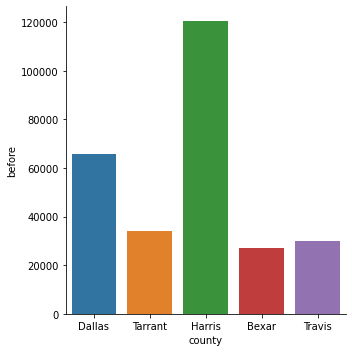

In [ ]:
sns.catplot(data = catplot_data, x = 'county', y = 'before', kind="bar")

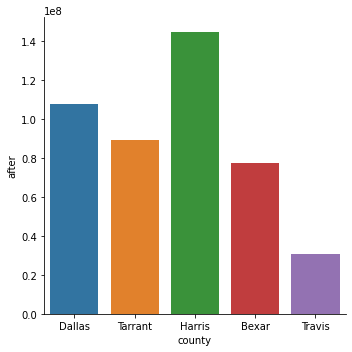

In [ ]:
sns.catplot(data = catplot_data, x = 'county', y = 'after', kind="bar")

In [ ]:
df_epidemiology_adm2_confirmed = df_epidemiology[['date',  'adm_area_1', 'adm_area_2', 'confirmed']]
df_epidemiology_adm2_confirmed.head()

,date,adm_area_1,adm_area_2,confirmed
0,2021-07-04,Texas,Tarrant,263690
1,2021-07-04,Texas,Taylor,16047
2,2021-07-04,Texas,Terry,1702
3,2021-07-04,Texas,Throckmorton,73
4,2021-07-04,Texas,Titus,4229


In [ ]:
start_date = datetime.date(year=2020,  month=5,  day=1)
agg_confirmed_before = {}
agg_confirmed_after = {}
for item in df_epidemiology['adm_area_2'].unique():
    agg_confirmed_before[item] = df_epidemiology.loc[(df_epidemiology['adm_area_2'] == item) & (df_epidemiology['date'] < start_date), 'confirmed'].sum()
    agg_confirmed_after[item] = df_epidemiology.loc[(df_epidemiology['adm_area_2'] == item) & (df_epidemiology['date'] > start_date), 'confirmed'].sum()

In [ ]:
sql_command = """SELECT * FROM mobility ORDER by date DESC"""
df_epidemiology = pd.read_sql(sql_command, conn)
df_epidemiology.head(5)

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,transit_stations,residential,workplace,parks,retail_recreation,grocery_pharmacy,gid,transit,walking,driving
0,APPLE_MOBILITY,2021-10-20,United States,USA,Indiana,Shelby,None,NaN,NaN,NaN,NaN,NaN,NaN,[USA.15.74_1],None,None,180.08
1,APPLE_MOBILITY,2021-10-20,United States,USA,Texas,Hunt,None,NaN,NaN,NaN,NaN,NaN,NaN,[USA.44.116_1],None,None,173.93
2,APPLE_MOBILITY,2021-10-20,United States,USA,Ohio,Shelby,None,NaN,NaN,NaN,NaN,NaN,NaN,[USA.36.76_1],None,None,143.97
3,APPLE_MOBILITY,2021-10-20,United States,USA,New Jersey,Hunterdon,None,NaN,NaN,NaN,NaN,NaN,NaN,[USA.31.10_1],None,None,142.11
4,APPLE_MOBILITY,2021-10-20,United States,USA,Pennsylvania,Huntingdon,None,NaN,NaN,NaN,NaN,NaN,NaN,[USA.39.31_1],None,None,176.62


In [ ]:
sql_command = """SELECT epidemiology.date, epidemiology.adm_area_1, epidemiology.adm_area_2, epidemiology.confirmed, mobility.driving
FROM epidemiology
INNER JOIN mobility ON epidemiology.country=mobility.country
WHERE epidemiology.source = 'USA_NYT' and epidemiology.adm_area_1 = 'Texas' and epidemiology.country = 'United States' and epidemiology.adm_area_1 = 'Texas'"""
df_join = pd.read_sql(sql_command, conn)
df_join.head()

In [ ]:
sql_command = """SELECT * FROM mobility WHERE country = 'United States' and adm_area_1 = 'Texas'"""
df_mobility = pd.read_sql(sql_command, conn)
df_mobility.head()

,source,date,country,countrycode,adm_area_1,adm_area_2,adm_area_3,transit_stations,residential,workplace,parks,retail_recreation,grocery_pharmacy,gid,transit,walking,driving
0,APPLE_MOBILITY,2021-01-19,United States,USA,Texas,Bexar,None,NaN,NaN,NaN,NaN,NaN,NaN,[USA.44.15_1],None,None,96.21
1,GOOGLE_MOBILITY,2020-11-05,United States,USA,Texas,Kendall,None,-7.0,9.0,-23.0,NaN,-14.0,-18.0,[USA.44.130_1],None,None,NaN
2,GOOGLE_MOBILITY,2020-05-03,United States,USA,Texas,Kerr,None,NaN,NaN,-23.0,30.0,-10.0,-16.0,[USA.44.133_1],None,None,NaN
3,APPLE_MOBILITY,2021-01-18,United States,USA,Texas,Bexar,None,NaN,NaN,NaN,NaN,NaN,NaN,[USA.44.15_1],None,None,101.22
4,GOOGLE_MOBILITY,2020-04-17,United States,USA,Texas,Kerr,None,NaN,16.0,-30.0,-8.0,-32.0,-14.0,[USA.44.133_1],None,None,NaN


In [5]:
county = ['Dallas', 'Tarrant', 'Harris', 'Bexar', 'Travis']
start_date = datetime.date(year=2020,  month=5,  day=1)
county_1 = []
agg_confirmed = []
before_after = []
for item in county:
    county_1.append(item)
    agg_confirmed.append(df_epidemiology.loc[(df_epidemiology['adm_area_2'] == item) & (df_epidemiology['date'] < start_date), 'confirmed'].sum())
    before_after.append('before')
for item in county:
    county_1.append(item)
    agg_confirmed.append(df_epidemiology.loc[(df_epidemiology['adm_area_2'] == item) & (df_epidemiology['date'] > start_date), 'confirmed'].sum())
    before_after.append('after')


In [6]:
print(county_1, agg_confirmed, before_after)

['Dallas', 'Tarrant', 'Harris', 'Bexar', 'Travis', 'Dallas', 'Tarrant', 'Harris', 'Bexar', 'Travis'] [65598, 34249, 120489, 27161, 29943, 108132145, 89615363, 145700552, 77870366, 30959589] ['before', 'before', 'before', 'before', 'before', 'after', 'after', 'after', 'after', 'after']


In [11]:
df_barplot = pd.DataFrame(list(zip(county_1, agg_confirmed, before_after)), columns =['County', 'Sum', 'Threshold'])
df_barplot

,County,Sum,Threshold
0,Dallas,65598,before
1,Tarrant,34249,before
2,Harris,120489,before
3,Bexar,27161,before
4,Travis,29943,before
5,Dallas,108132145,after
6,Tarrant,89615363,after
7,Harris,145700552,after
8,Bexar,77870366,after
9,Travis,30959589,after


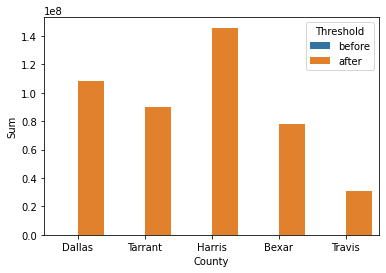

In [13]:
sns.barplot(x = 'County', y = 'Sum', hue = 'Threshold', data = df_barplot)